In [2]:

import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

0
1
NVIDIA GeForce RTX 4070 Laptop GPU


device(type='cuda', index=0)

![screenshot-clone](screenshot-clone.png)
![screenshot-env](screenshot-env.png)

torch.Size([2000, 2])


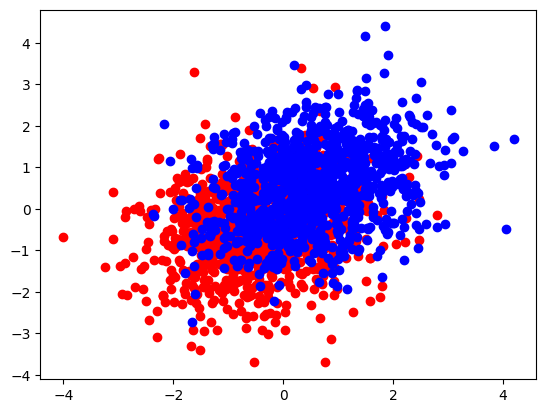

In [3]:

import matplotlib.pyplot as plt

mean_a = torch.tensor([-0.5, -0.5])
cov_a = torch.tensor([[1.0, 0.25],
                      [0.25, 1.0]])

mean_b = torch.tensor([0.5, 0.5])
cov_b = torch.tensor([[1, 0.25],
                      [0.25, 1]])

dist_a = torch.distributions.MultivariateNormal(mean_a, cov_a)
samples_a = dist_a.sample((1000,))


dist_b = torch.distributions.MultivariateNormal(mean_b, cov_b)
samples_b = dist_b.sample((1000,))

x = torch.concat([samples_a,samples_b])

print(x.shape)

u_a = samples_a[:,0].numpy() ##numpy for plot
v_a = samples_a[:,1].numpy()
u_b = samples_b[:,0].numpy()
v_b = samples_b[:,1].numpy()


plt.scatter(u_a,v_a,c='red')
plt.scatter(u_b,v_b,c='blue')

In [4]:
##x = (x-x.min())/(x.max()-x.min())  //if scaling is needed

centroid_a = torch.randn(2) ##random centroid
centroid_b = torch.randn(2)
print(centroid_a,centroid_b)

centroids = torch.stack((centroid_a,centroid_b),dim=0)


tensor([ 0.4006, -1.2404]) tensor([-1.2124,  0.3563])


In [28]:
max_iters = 1000
threshold = 1e-4
k=2

for i in range(max_iters):

    distances = torch.cdist(x, centroids)
    labels = torch.argmin(distances, dim=1)
    new_centroid = x[labels == 0].mean(dim=0)

    for j in range(1,k):
        new_centroid=torch.stack([new_centroid,x[labels == j].mean(dim=0)])

    if(torch.dist(centroids,new_centroid)<=threshold):
        centroids = new_centroid
        break

    centroids = new_centroid



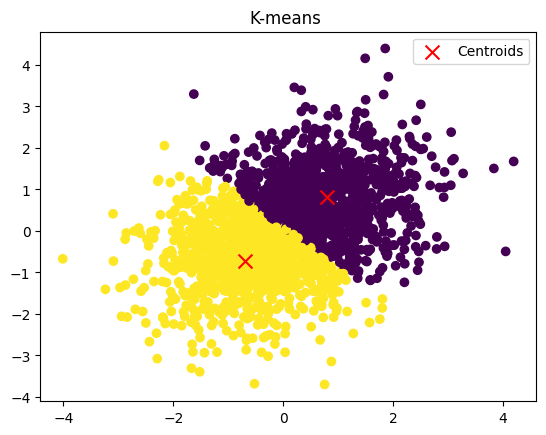

tensor([[ 0.7943,  0.8218],
        [-0.6875, -0.7208]])


In [30]:
plt.scatter(x[:, 0].numpy(), x[:, 1].numpy(), c=labels.numpy(), marker='o')
plt.scatter(centroids[:, 0].numpy(), centroids[:, 1].numpy(), c='red', marker='x', s=100, label='Centroids')
plt.title("K-means ")
plt.legend()
plt.show()
print(centroids)
##==============================end of Kmeans=====================================##

In [55]:
import numpy as np

X= torch.tensor(np.zeros(shape=(100,4)))
Distdata = torch.distributions.Normal(0,1)
Distnoise = torch.distributions.Normal(0,0.1)


X[:,0]=  Distdata.sample((100,))
X[:,1]=  Distdata.sample((100,))
X[:,2]=  3*X[:,0]-2*X[:,1]+Distnoise.sample((100,))
X[:,3]=  1.5*X[:,0]-0.5*X[:,1]+Distnoise.sample((100,))
print(X.shape)
##same data setup as that of the video but using torch to generate##

torch.Size([100, 4])


In [56]:
cov=torch.cov(X.T)
eigval,eigvec = torch.linalg.eig(cov)
print(eigvec)
print(eigval)  ##need to sort

tensor([[ 0.1863+0.j, -0.4936+0.j, -0.8266+0.j, -0.1959+0.j],
        [-0.1681+0.j, -0.7886+0.j,  0.5057+0.j, -0.3067+0.j],
        [ 0.8979+0.j,  0.0971+0.j,  0.2302+0.j, -0.3624+0.j],
        [ 0.3617+0.j, -0.3535+0.j,  0.0893+0.j,  0.8580+0.j]],
       dtype=torch.complex128)
tensor([1.7358e+01+0.j, 1.2580e+00+0.j, 5.6163e-04+0.j, 8.0977e-03+0.j],
       dtype=torch.complex128)


In [74]:
print(torch.sort(torch.real(eigval),descending=True))
eigval,indices = torch.sort(torch.real(eigval),descending=True)
print(indices)
eigvec_sort = (eigvec.T[indices]).T
print(eigvec_sort) ##result

torch.return_types.sort(
values=tensor([1.7358e+01, 1.2580e+00, 8.0977e-03, 5.6163e-04], dtype=torch.float64),
indices=tensor([0, 1, 3, 2]))
tensor([0, 1, 3, 2])
tensor([[ 0.1863+0.j, -0.4936+0.j, -0.1959+0.j, -0.8266+0.j],
        [-0.1681+0.j, -0.7886+0.j, -0.3067+0.j,  0.5057+0.j],
        [ 0.8979+0.j,  0.0971+0.j, -0.3624+0.j,  0.2302+0.j],
        [ 0.3617+0.j, -0.3535+0.j,  0.8580+0.j,  0.0893+0.j]],
       dtype=torch.complex128)


In [70]:
from sklearn.decomposition import PCA

pca =PCA(n_components =4 )
pca.fit(X)
print(pca.components_.T)##compare with sklearn implementation


##==============PCA end============##

[[ 0.18627231  0.49361786 -0.1958833   0.82660375]
 [-0.16814087  0.78861824 -0.30668609 -0.50572084]
 [ 0.89790668 -0.09712338 -0.36239429 -0.2302195 ]
 [ 0.36165572  0.35353887  0.85804648 -0.0892841 ]]
